# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Gathering

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
df.drop(columns=["User ID"], inplace=True)

In [15]:
# Converting in 0 and 1 Format

df["Gender"].replace({"Female":0, "Male":1}, inplace=True)

In [16]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [18]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [25]:
# Separating Dependent & Independent Columns

x = df.drop(columns=["Purchased"])
y = df[["Purchased"]]

In [26]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [27]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [30]:
x_train.shape

(280, 3)

In [31]:
x_test.shape

(120, 3)

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier()

# Model Training

In [55]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

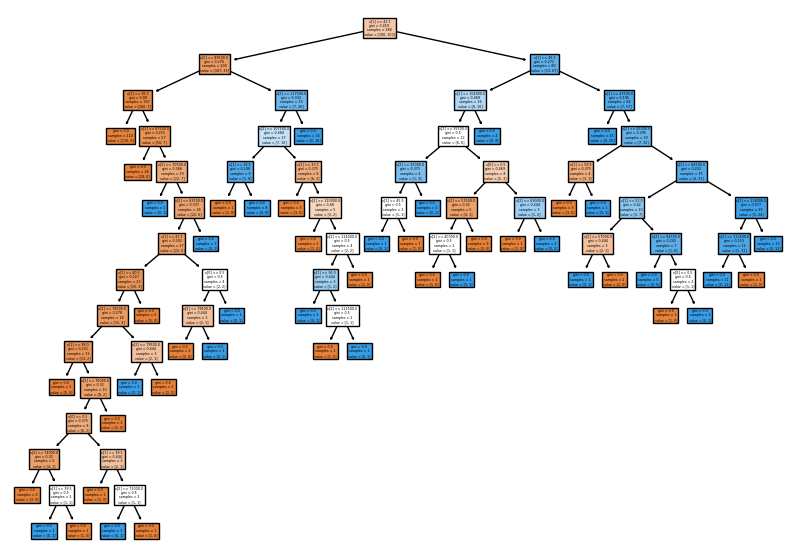

In [56]:
plt.figure(figsize=[10,7])
tree = plot_tree(dt_model, filled=True)

In [57]:
ypred = dt_model.predict(x_test)
ypred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

# Model Evaluation

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
acc = accuracy_score(ypred, y_test)
acc

0.875

In [63]:
clf_report = classification_report(ypred, y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        74
           1       0.86      0.80      0.83        46

    accuracy                           0.88       120
   macro avg       0.87      0.86      0.87       120
weighted avg       0.87      0.88      0.87       120



# Hyperparameter Tuning

#### Hyperparameter Tuning is IMPORTANT in Decision tree, bcoz dt-model always OVERFITS 

### GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV


parameters = {'criterion':["gini", "entropy"],
      "max_depth":[2,3,4,5,6,7,None]}


gscv = GridSearchCV(dt_model, param_grid=parameters)

In [67]:
gscv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, None]})

In [68]:
gscv.best_params_  # Shows the best parameters

{'criterion': 'entropy', 'max_depth': 5}

In [69]:
gscv.best_score_

0.9

# Result

In [73]:
print("Accuracy of dt_model:",acc)
print("Accuracy after Hyperparameter Tuning:",gscv.best_score_)

Accuracy of dt_model: 0.875
Accuracy after Hyperparameter Tuning: 0.9
